<a href="https://colab.research.google.com/github/aovladi/cs480student/blob/main/01/CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

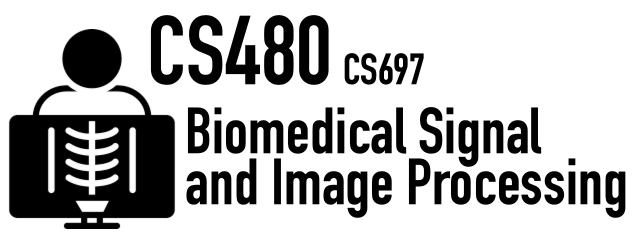
# Assignment 1


Done by Olga Andreeva


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [3]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

First, I would like to look at the duration of the signal

In [4]:
print("Total number of minutes recorded: {} mins".format(np.shape(np.asarray(ecg))[0]/ SAMPLING_RATE /60))

Total number of minutes recorded: 5.0 mins


**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

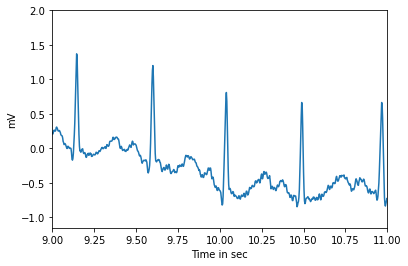

In [5]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds
t = np.arange(ecg.size) / SAMPLING_RATE
plt.plot(t, ecg)
#We can just limit x axis with the required interval 
plt.xlim(9,11)
plt.ylim(-1.15,2)
plt.xlabel("Time in sec")
plt.ylabel("mV")
plt.show()

A proper way to do this:

1.   To arange t from 9th to 11th second with a sampling rate = 1./SAMPLING_RATE 
2.  Then, we need to pick ecg data from the particular interval, which we can detect by multiplying SAMPLING_RATE by 9 and 11 to find start and end position of our interval.

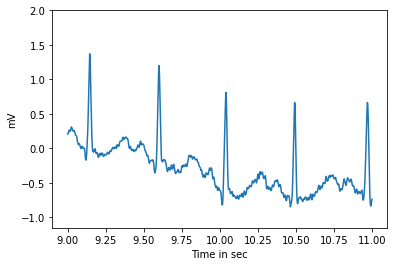

In [6]:
# Other way to do this
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds
t = np.arange(9, 11, step = 1. / SAMPLING_RATE)
plt.plot(t, ecg[9*SAMPLING_RATE:11*SAMPLING_RATE])
plt.xlabel("Time in sec")
plt.ylabel("mV")
plt.ylim(-1.15,2)
plt.show()

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [7]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [8]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

In [9]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [10]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


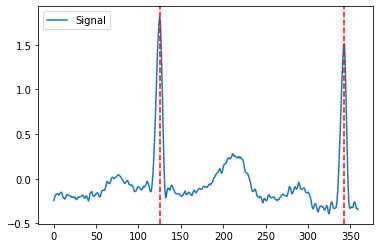

In [11]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

Here I create start and end variables, that indicate start and end of the interval of the ecg data with an extended range

In [12]:
start = 8*SAMPLING_RATE # start from 8th min
end= 12*SAMPLING_RATE # end on 12th min

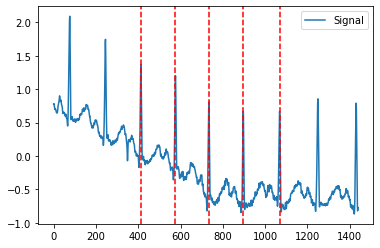

In [13]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1
_, rpeaks_range = nk.ecg_peaks(ecg[start:end], sampling_rate=SAMPLING_RATE)
plot = nk.events_plot(rpeaks_range['ECG_R_Peaks'][1:6], ecg[start:end]) 

In [14]:
rpeaks_range['ECG_R_Peaks']

array([ 245,  412,  576,  734,  896, 1068, 1249])

start peak for 9th min is located after : (9-8)*360 = 360 , i.e. 412-> rpeaks[1] <br>
end peak is located before: (11-8)*360 = 1,080, i.e. 1,068 -> rpeaks[5] 

**Task 3:** Detect Heartrate. [15 Points]

In [15]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [16]:
#R peaks in 10 sec:
_, rpeaks_10sec = nk.ecg_peaks(ecg[0:11*SAMPLING_RATE], sampling_rate= SAMPLING_RATE)

In [17]:
# number of detected R peaks
len(rpeaks_10sec['ECG_R_Peaks'])

21

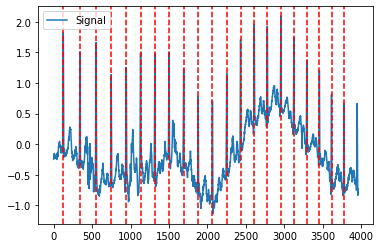

In [18]:
plot_10_sec=nk.events_plot(rpeaks_10sec['ECG_R_Peaks'], ecg[0:11*SAMPLING_RATE])

21 R peaks per 10 sec <br>
HR = number of R peaks per 10 sec * 6 = 21 * 6<br>
**ANSWER** <br>
**HR = 126 bpm** <br>
It looks like an elevated heart rate.

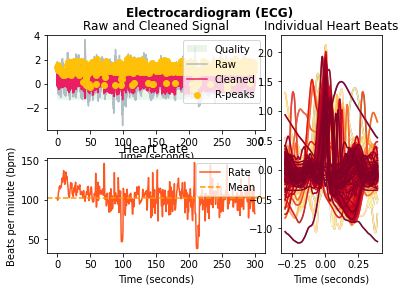

In [19]:
# here I use ecg_process() to look at the whole signal's stats
signals, info = nk.ecg_process(ecg, sampling_rate=SAMPLING_RATE)
plot = nk.ecg_plot(signals, sampling_rate=SAMPLING_RATE)
plot.show()

Based on this plot, we can see, that the mean bpm is 105 for the entire signal.

**Task 4:** Detect P Q S T Peaks. [25 Points]

In [20]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

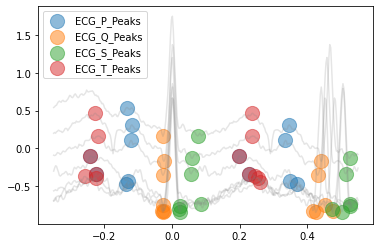

In [21]:
_, waves_peak = nk.ecg_delineate(ecg[start:end], rpeaks_range, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

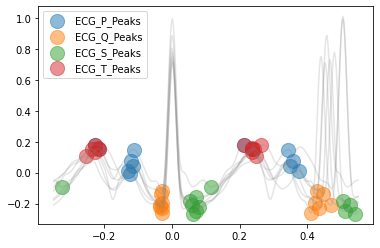

In [22]:
# ecg_delineate recommends to clean ecg signal with ecg_clean(), 
# so let's have a look, if situation improves 
ecg_clean = nk.ecg_clean(ecg[start:end], sampling_rate= SAMPLING_RATE)
_, waves_peak = nk.ecg_delineate(ecg_clean, rpeaks_range, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [23]:
# TODO Does the detection work well?

No, even with cleaned signal it contains misclassifications/ errors 


**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

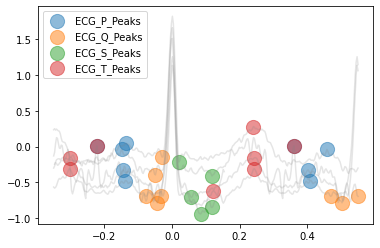

In [24]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.
_, waves_peak = nk.ecg_delineate(ecg[:1000], rpeaks['ECG_R_Peaks'][:5], sampling_rate=SAMPLING_RATE,show=True, show_type='peaks')
#some incorrect detections

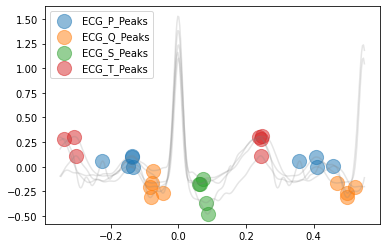

In [25]:
# ecg_delineate recommends to clean ecg signal with ecg_clean(), 
# so let's have a look, if situation improves 
ecg_clean = nk.ecg_clean(ecg, sampling_rate= SAMPLING_RATE)
_, waves_peak = nk.ecg_delineate(ecg_clean[:1000], rpeaks['ECG_R_Peaks'][:5], sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

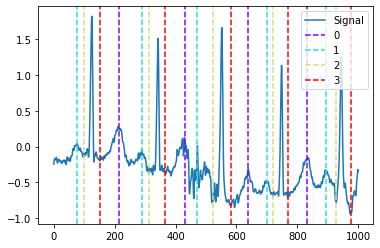

In [26]:
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5],
                       waves_peak['ECG_P_Peaks'][:5],
                       waves_peak['ECG_Q_Peaks'][:5],
                       waves_peak['ECG_S_Peaks'][:5]], ecg[:1000])

In [27]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

In [28]:
cleaned_low_1 = nk.signal_filter(ecg, lowcut=0.8)
cleaned_low_2 = nk.signal_filter(ecg, lowcut= 0.2)

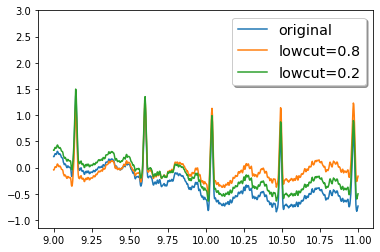

In [29]:
#Let's look at different plots
t = np.arange(9, 11, step = 1. / SAMPLING_RATE)
fig, ax = plt.subplots()
ax.plot(t, ecg[9*SAMPLING_RATE:11*SAMPLING_RATE], label='original')
ax.plot(t, cleaned_low_1[9*SAMPLING_RATE:11*SAMPLING_RATE], label='lowcut=0.8')
ax.plot(t, cleaned_low_2[9*SAMPLING_RATE:11*SAMPLING_RATE], label='lowcut=0.2')
plt.ylim(-1.15,3)
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.show()

In [30]:
cleaned_low_9_11 = cleaned_low_1[start:end]

In [32]:
cleaned_high_1 = nk.signal_filter(ecg, highcut=50.0)
cleaned_high_2 = nk.signal_filter(ecg, highcut= 10.0)

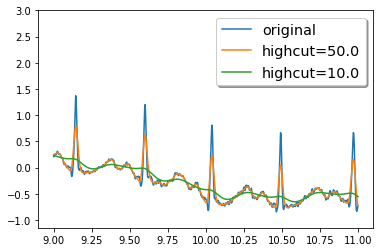

In [33]:
# Other way to do this
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds
t = np.arange(9, 11, step = 1. / SAMPLING_RATE)
fig, ax = plt.subplots()
ax.plot(t, ecg[9*SAMPLING_RATE:11*SAMPLING_RATE], label='original')
ax.plot(t, cleaned_high_1[9*SAMPLING_RATE:11*SAMPLING_RATE], label='highcut=50.0')
ax.plot(t, cleaned_high_2[9*SAMPLING_RATE:11*SAMPLING_RATE], label='highcut=10.0')
plt.ylim(-1.15,3)
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
plt.show()

As we can see, highcut 10 destroyed our signal and it does not look like ecg anymore; highcut = 50.0 works better <br>
Thus, it make sence to combine highcut 50 and lowcut 0.8 to clean our signal

In [34]:
cleaned_signal = nk.signal_filter(ecg, lowcut=0.8, highcut=50.0)

Now, let's see if there is any improvement in the detection

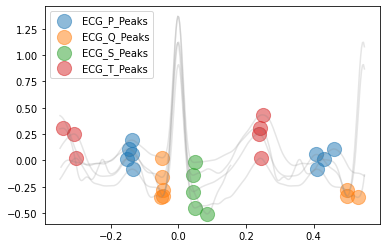

In [35]:
_, waves_peak = nk.ecg_delineate(cleaned_signal[:1000], rpeaks['ECG_R_Peaks'][:5], sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [36]:
# TODO Does the filtering improve the result? ()

Yes, it does

In [37]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#